## Librerías :

In [1]:
import tensorflow as tf
from tensorflow import keras
import os
import sys
import cv2 as cv
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from tqdm import tqdm
%matplotlib inline

## Data Analysis:


In [2]:
classes={0:'Safe Driving'
         ,1:'texting - right'
         ,2:'talking on the phone - right'
         ,3:'texting - left'
         ,4:'talking on the phone - left'
         ,5:'operating the radio'
         ,6:'drinking'
         ,7:'reaching behind'
         ,8:'hair and makeup'
         ,9:'talking to passenger'}

In [3]:
data1 = pd.read_csv('../files/driver_imgs_list.csv')

for j in np.unique(data1["classname"]):
    print ("clase :",j,"Numero de ejemplares:",np.count_nonzero(data1["classname"][data1.classname==j]))

clase : c0 Numero de ejemplares: 2489
clase : c1 Numero de ejemplares: 2267
clase : c2 Numero de ejemplares: 2317
clase : c3 Numero de ejemplares: 2346
clase : c4 Numero de ejemplares: 2326
clase : c5 Numero de ejemplares: 2312
clase : c6 Numero de ejemplares: 2325
clase : c7 Numero de ejemplares: 2002
clase : c8 Numero de ejemplares: 1911
clase : c9 Numero de ejemplares: 2129


In [4]:
path_test_images='../../datasets/driver-detections/test/'
path_images='../../datasets/driver-detections/train/'
test_images_names=os.listdir(path_test_images)
print("Numero Ejemplares Test:",len(test_images_names))

Numero Ejemplares Test: 79726


In [5]:
data1.head()

,subject,classname,img
0,p002,c0,img_44733.jpg
1,p002,c0,img_72999.jpg
2,p002,c0,img_25094.jpg
3,p002,c0,img_69092.jpg
4,p002,c0,img_92629.jpg


### Example  and resize View:

In [6]:
imagen=cv.cvtColor(cv.imread(path_test_images+random.choice(test_images_names)), cv.COLOR_BGR2RGB)
print ("Las dimensiones de cada imagen son de:",imagen.shape)

Las dimensiones de cada imagen son de: (480, 640, 3)


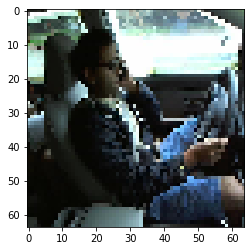

In [7]:
imagen2=cv.resize(imagen,(64,64),interpolation = cv.INTER_CUBIC)
plt.imshow(imagen2)

## Tiny Dataset Creation:

In [8]:
size=1000 #<1911
X=[]
y=[]
for i in tqdm(np.unique(data1["classname"])):
    for j in np.random.choice(data1["img"][data1.classname==i],size):
    #for j in data1["img"][data1.classname==i]:
        temp_image=cv.cvtColor(cv.imread(path_images+i+"/"+j), cv.COLOR_BGR2RGB)
        X.append(cv.resize(temp_image,(64,64),interpolation = cv.INTER_CUBIC))
        y.append(int(i[-1]))
        
c = list(zip(X, y))

random.shuffle(c)

X,y = zip(*c)   

X=np.array(X)
y=np.array(y)

test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size,shuffle=1)



X_train = X_train.astype('float32')
X_train /= 255
X_test = X_test.astype('float32')
X_test /= 255


print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [02:54<00:00, 17.17s/it]


(8000, 64, 64, 3) (8000,) (2000, 64, 64, 3) (2000,)


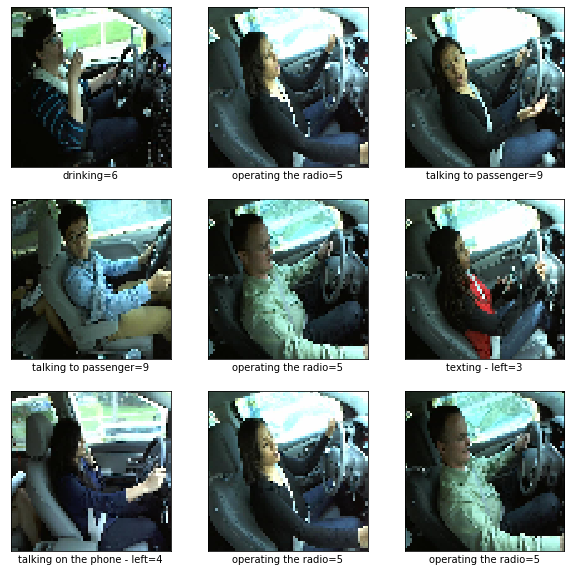

In [9]:

plt.figure(figsize=(10,10))
for i,j in enumerate(np.random.randint(0,500,9)):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[j],cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[j]]+"="+str(y_train[j]))

## Creating Convolutional Neuronal Network

### <span style="color:orange"> Model 1</span>:

In [10]:
model_CNN =  keras.models.Sequential()
model_CNN.add(keras.layers.Conv2D(20, (5, 5), activation='relu', kernel_initializer='he_uniform', padding='valid', input_shape=(64, 64, 3)))
model_CNN.add(keras.layers.MaxPooling2D((2, 2)))
model_CNN.add(keras.layers.Conv2D(50, (5, 5), activation='relu', kernel_initializer='he_uniform', padding='valid'))
model_CNN.add(keras.layers.MaxPooling2D((2, 2)))
model_CNN.add(keras.layers.Flatten())
model_CNN.add(keras.layers.Dense(500, activation='relu', kernel_initializer='he_uniform'))
model_CNN.add(keras.layers.Dense(10, activation='softmax'))

model_CNN.summary()

W0731 10:15:31.681793  9608 deprecation.py:506] From C:\programming\WPy64-3740\python-3.7.4.amd64\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 60, 60, 20)        1520      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 20)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 50)        25050     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 50)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8450)              0         
_________________________________________________________________
dense (Dense)                (None, 500)               4225500   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5

In [11]:
opt = keras.optimizers.SGD(lr=0.001, momentum=0.9)
model_CNN.compile(optimizer=opt, loss='sparse_categorical_crossentropy',metrics=['accuracy'])


$Fitting:$

In [12]:
history = model_CNN.fit(X_train,y_train, epochs=10, batch_size=60, verbose=2,validation_data=(X_test, y_test))

Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 - 37s - loss: 1.9886 - acc: 0.3100 - val_loss: 1.6242 - val_acc: 0.4370
Epoch 2/10
8000/8000 - 37s - loss: 1.2223 - acc: 0.6305 - val_loss: 0.9341 - val_acc: 0.7260
Epoch 3/10
8000/8000 - 36s - loss: 0.7154 - acc: 0.8041 - val_loss: 0.5490 - val_acc: 0.8755
Epoch 4/10
8000/8000 - 36s - loss: 0.4324 - acc: 0.8953 - val_loss: 0.3953 - val_acc: 0.8950
Epoch 5/10
8000/8000 - 37s - loss: 0.2799 - acc: 0.9380 - val_loss: 0.2856 - val_acc: 0.9330
Epoch 6/10
8000/8000 - 37s - loss: 0.2158 - acc: 0.9516 - val_loss: 0.2077 - val_acc: 0.9535
Epoch 7/10
8000/8000 - 37s - loss: 0.1492 - acc: 0.9709 - val_loss: 0.1735 - val_acc: 0.9600
Epoch 8/10
8000/8000 - 38s - loss: 0.1167 - acc: 0.9755 - val_loss: 0.1354 - val_acc: 0.9695
Epoch 9/10
8000/8000 - 38s - loss: 0.0913 - acc: 0.9820 - val_loss: 0.1646 - val_acc: 0.9555
Epoch 10/10
8000/8000 - 38s - loss: 0.0746 - acc: 0.9855 - val_loss: 0.1256 - val_acc: 0.9660


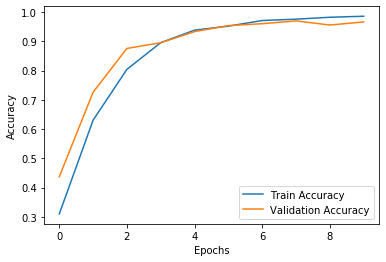

In [14]:
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

$Testing:$

Foto: img_55278.jpg valor predicho: 9  clase:  talking to passenger
Foto: img_56689.jpg valor predicho: 3  clase:  texting - left
Foto: img_53709.jpg valor predicho: 2  clase:  talking on the phone - right
Foto: img_23132.jpg valor predicho: 1  clase:  texting - right
Foto: img_15678.jpg valor predicho: 0  clase:  Safe Driving
Foto: img_29038.jpg valor predicho: 2  clase:  talking on the phone - right
Foto: img_64271.jpg valor predicho: 6  clase:  drinking
Foto: img_59303.jpg valor predicho: 2  clase:  talking on the phone - right
Foto: img_92851.jpg valor predicho: 9  clase:  talking to passenger


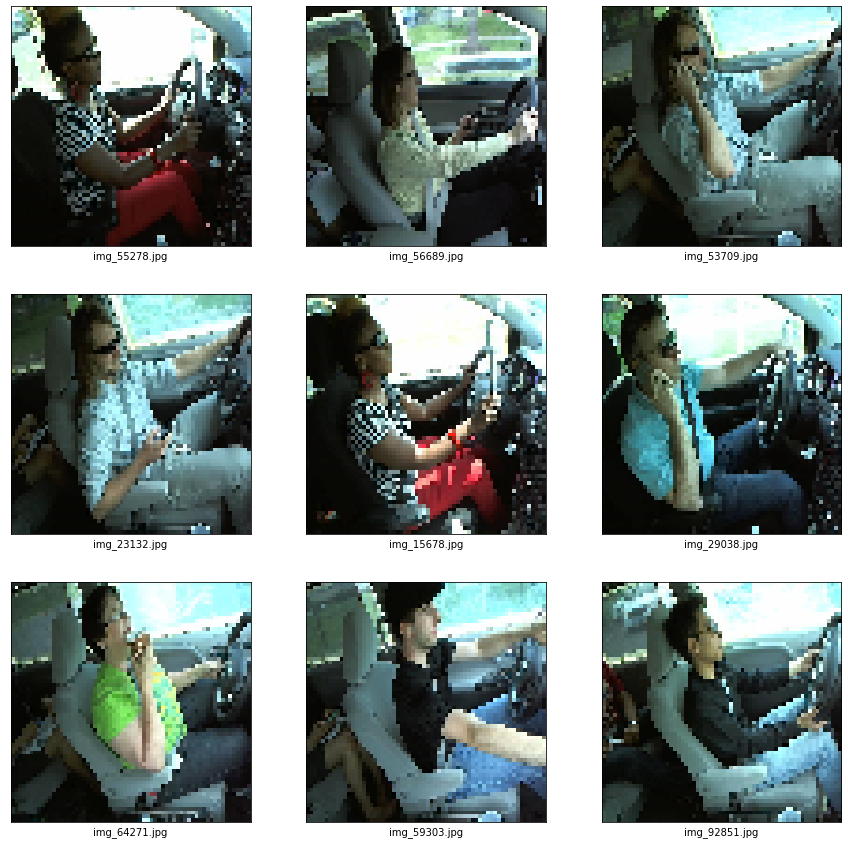

In [22]:

test_images=[]
temp=np.random.choice(test_images_names,9)
for i in temp:
    temp_image=cv.cvtColor(cv.imread(path_test_images+i), cv.COLOR_BGR2RGB)
    test_images.append(cv.resize(temp_image,(64,64),interpolation = cv.INTER_CUBIC))
    
test_images=np.array(test_images)
plt.figure(figsize=(15,15))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i],cmap=plt.cm.binary)
    plt.xlabel(temp[i])

test_images = test_images.astype('float32')
test_images/= 255

prediccion=model_CNN.predict(test_images)
for i in range(len(test_images)):
    print ("Foto:",temp[i],"valor predicho:",  np.argmax(prediccion[i]), " clase: ", classes[np.argmax(prediccion[i])])

## Visualizing filter responses

In [23]:
layer_outputs = [layer.output for layer in model_CNN.layers ]
layer_outputs

[<tf.Tensor 'conv2d/Relu:0' shape=(?, 60, 60, 20) dtype=float32>,
 <tf.Tensor 'max_pooling2d/MaxPool:0' shape=(?, 30, 30, 20) dtype=float32>,
 <tf.Tensor 'conv2d_2/Relu:0' shape=(?, 26, 26, 50) dtype=float32>,
 <tf.Tensor 'max_pooling2d_2/MaxPool:0' shape=(?, 13, 13, 50) dtype=float32>,
 <tf.Tensor 'flatten/Reshape:0' shape=(?, 8450) dtype=float32>,
 <tf.Tensor 'dense/Relu:0' shape=(?, 500) dtype=float32>,
 <tf.Tensor 'dense_2/Softmax:0' shape=(?, 10) dtype=float32>]

In [49]:
activation_model = keras.models.Model(inputs=model_CNN.input, outputs=layer_outputs)
array = np.expand_dims(X_test[1], axis=0)
activations = activation_model.predict(array)

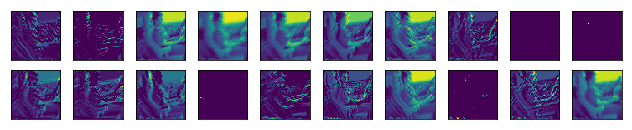

In [50]:
plt.figure(figsize=(11,2))
for i in range(20):
    plt.subplot(2,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(activations[0][0,:, :, i], cmap='viridis')
    

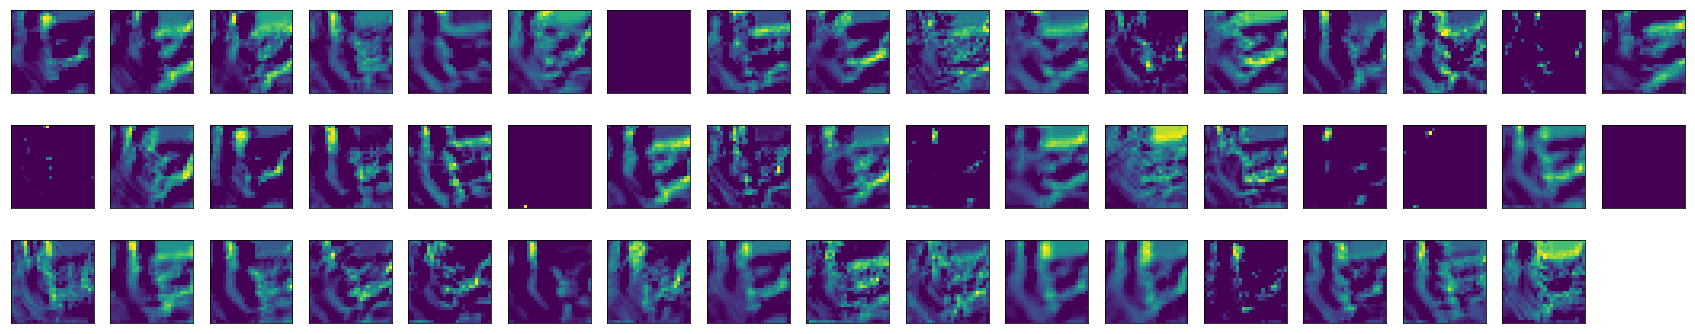

In [51]:
plt.figure(figsize=(30,6))
for i in range(50):
    plt.subplot(3,17,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(activations[2][0,:, :, i], cmap='viridis')

### <span style="color:red"> --------------------------------------------------------------------------------------------------------------------------------------------------- </span>
### <span style="color:orange"> Model 2</span>:

In [18]:
model_CNN2 =  keras.models.Sequential()
model_CNN2.add(keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(64, 64, 3)))
model_CNN2.add(keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_CNN2.add(keras.layers.MaxPooling2D((2, 2)))
model_CNN2.add(keras.layers.Flatten())
model_CNN2.add(keras.layers.Dense(512, activation='relu', kernel_initializer='he_uniform'))
model_CNN2.add(keras.layers.Dense(256, activation='relu', kernel_initializer='he_uniform'))
model_CNN2.add(keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
model_CNN2.add(keras.layers.Dense(10, activation='softmax'))

model_CNN2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 64, 64, 64)        1792      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               16777728  
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 128)              

In [19]:
opt = keras.optimizers.SGD(lr=0.001, momentum=0.9)
model_CNN2.compile(optimizer=opt, loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#loss:categorical_crossentropy if we have y with one hot encoding 


In [20]:
history2 = model_CNN2.fit(X_train,y_train, epochs=10, batch_size=60, verbose=2,validation_data=(X_test, y_test))

Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 - 116s - loss: 1.8256 - acc: 0.3652 - val_loss: 1.3216 - val_acc: 0.5420
Epoch 2/10
8000/8000 - 118s - loss: 0.8380 - acc: 0.7487 - val_loss: 0.5356 - val_acc: 0.8495
Epoch 3/10
8000/8000 - 113s - loss: 0.3172 - acc: 0.9233 - val_loss: 0.2919 - val_acc: 0.9185
Epoch 4/10
8000/8000 - 114s - loss: 0.1453 - acc: 0.9672 - val_loss: 0.1299 - val_acc: 0.9700
Epoch 5/10
8000/8000 - 113s - loss: 0.0676 - acc: 0.9879 - val_loss: 0.1009 - val_acc: 0.9695
Epoch 6/10
8000/8000 - 112s - loss: 0.0398 - acc: 0.9942 - val_loss: 0.0765 - val_acc: 0.9800
Epoch 7/10
8000/8000 - 114s - loss: 0.0240 - acc: 0.9975 - val_loss: 0.0705 - val_acc: 0.9795
Epoch 8/10
8000/8000 - 114s - loss: 0.0163 - acc: 0.9986 - val_loss: 0.0576 - val_acc: 0.9830
Epoch 9/10
8000/8000 - 116s - loss: 0.0107 - acc: 0.9996 - val_loss: 0.0496 - val_acc: 0.9880
Epoch 10/10
8000/8000 - 77s - loss: 0.0073 - acc: 0.9999 - val_loss: 0.0502 - val_acc: 0.9870


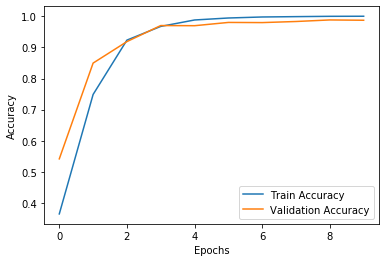

In [21]:
plt.plot(history2.history['acc'], label='Train Accuracy')
plt.plot(history2.history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

$Testing:$

Foto: img_52878.jpg valor predicho: 8  clase:  hair and makeup
Foto: img_70768.jpg valor predicho: 8  clase:  hair and makeup
Foto: img_83117.jpg valor predicho: 4  clase:  talking on the phone - left
Foto: img_67086.jpg valor predicho: 3  clase:  texting - left
Foto: img_26446.jpg valor predicho: 6  clase:  drinking
Foto: img_91230.jpg valor predicho: 7  clase:  reaching behind
Foto: img_36470.jpg valor predicho: 6  clase:  drinking
Foto: img_570.jpg valor predicho: 5  clase:  operating the radio
Foto: img_43572.jpg valor predicho: 8  clase:  hair and makeup


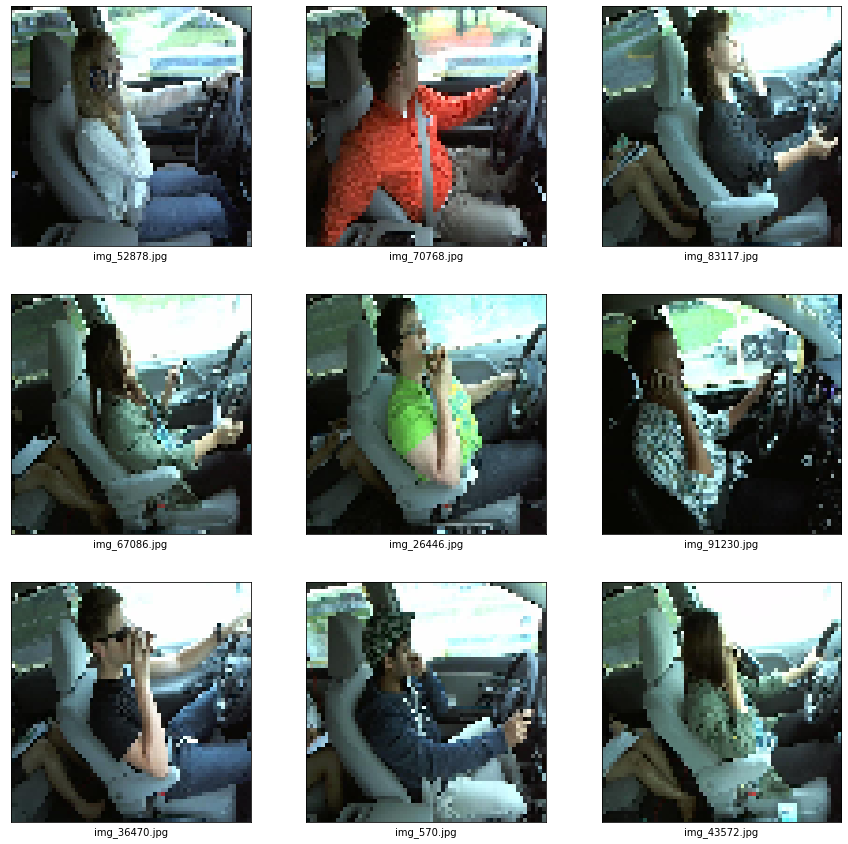

In [23]:

test_images=[]
temp=np.random.choice(test_images_names,9)
for i in temp:
    temp_image=cv.cvtColor(cv.imread(path_test_images+i), cv.COLOR_BGR2RGB)
    test_images.append(cv.resize(temp_image,(64,64),interpolation = cv.INTER_CUBIC))
    
test_images=np.array(test_images)
plt.figure(figsize=(15,15))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i],cmap=plt.cm.binary)
    plt.xlabel(temp[i])

test_images = test_images.astype('float32')
test_images/= 255

prediccion=model_CNN2.predict(test_images)
for i in range(len(test_images)):
    print ("Foto:",temp[i],"valor predicho:",  np.argmax(prediccion[i]), " clase: ", classes[np.argmax(prediccion[i])])

### <span style="color:red"> --------------------------------------------------------------------------------------------------------------------------------------------------- </span>
### <span style="color:orange"> Model 3</span>:

In [29]:
model_CNN3 =  keras.models.Sequential()
model_CNN3.add(keras.layers.Conv2D(32, (3, 3), kernel_initializer='he_normal', input_shape=(64, 64, 3)))
model_CNN3.add(keras.layers.MaxPooling2D((2, 2)))
model_CNN3.add(keras.layers.Dropout(0.5))
model_CNN3.add(keras.layers.Conv2D(64, (3, 3), kernel_initializer='he_normal'))
model_CNN3.add(keras.layers.MaxPooling2D((2, 2)))
model_CNN3.add(keras.layers.Dropout(0.5))
model_CNN3.add(keras.layers.Conv2D(128, (3, 3), kernel_initializer='he_normal'))
model_CNN3.add(keras.layers.MaxPooling2D((8, 8)))
model_CNN3.add(keras.layers.Dropout(0.5))
model_CNN3.add(keras.layers.Flatten())
model_CNN3.add(keras.layers.Dense(10, activation='softmax'))


model_CNN3.summary()

opt = keras.optimizers.SGD(lr=1e-3, momentum=0.9)
model_CNN3.compile(optimizer=opt, loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 12, 12, 128)      

In [30]:
history3 = model_CNN3.fit(X_train,y_train, epochs=10, batch_size=60, verbose=2,validation_data=(X_test, y_test))

Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 - 25s - loss: 4.1884 - acc: 0.1032 - val_loss: 2.3081 - val_acc: 0.1060
Epoch 2/10
8000/8000 - 23s - loss: 2.4921 - acc: 0.1051 - val_loss: 2.3168 - val_acc: 0.1055
Epoch 3/10
8000/8000 - 23s - loss: 2.3880 - acc: 0.1091 - val_loss: 2.3046 - val_acc: 0.0990
Epoch 4/10
8000/8000 - 23s - loss: 2.3610 - acc: 0.1136 - val_loss: 2.3004 - val_acc: 0.0990
Epoch 5/10
8000/8000 - 23s - loss: 2.3560 - acc: 0.1081 - val_loss: 2.2971 - val_acc: 0.0990
Epoch 6/10
8000/8000 - 23s - loss: 2.3389 - acc: 0.1116 - val_loss: 2.2929 - val_acc: 0.1000
Epoch 7/10
8000/8000 - 23s - loss: 2.3345 - acc: 0.1154 - val_loss: 2.2885 - val_acc: 0.1020
Epoch 8/10
8000/8000 - 23s - loss: 2.3243 - acc: 0.1208 - val_loss: 2.2828 - val_acc: 0.1195
Epoch 9/10
8000/8000 - 23s - loss: 2.3146 - acc: 0.1220 - val_loss: 2.2827 - val_acc: 0.1050
Epoch 10/10
8000/8000 - 23s - loss: 2.3091 - acc: 0.1203 - val_loss: 2.2757 - val_acc: 0.1285


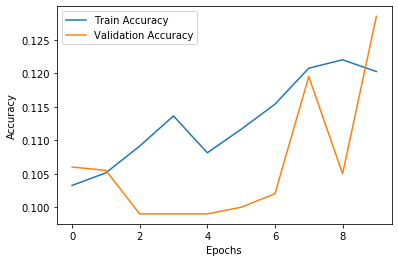

In [31]:
plt.plot(history3.history['acc'], label='Train Accuracy')
plt.plot(history3.history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [33]:
22424*20/100

4484.8